donepezil → SMILES: COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=C4)OC


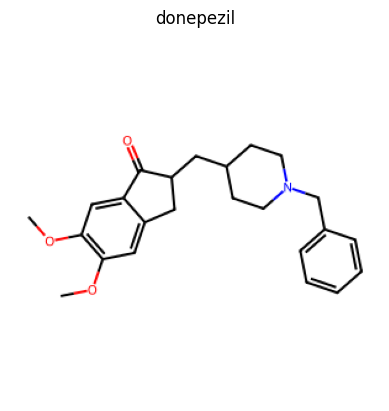

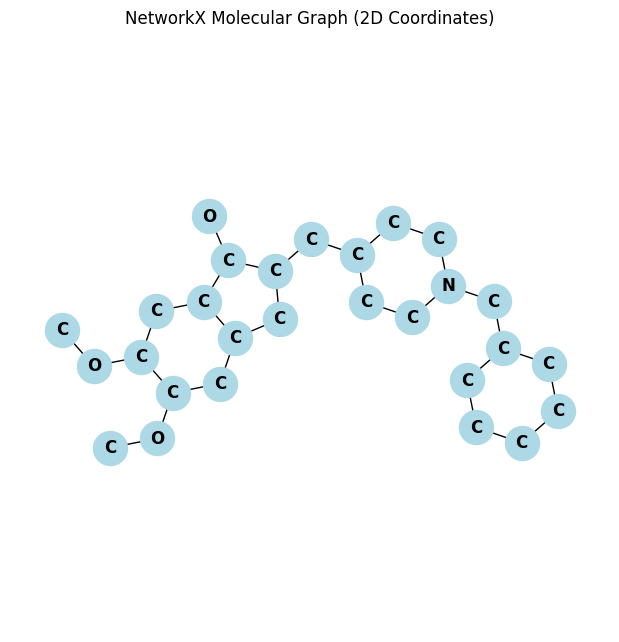

In [ ]:
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import networkx as nx

def get_smiles_from_pubchem(name):
    compounds = pcp.get_compounds(name, namespace='name')
    if not compounds:
        raise ValueError(f"No compound found for name: {name}")
    return compounds[0].canonical_smiles


def smiles_to_nx_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    AllChem.Compute2DCoords(mol)  
    G = nx.Graph()

    for atom in mol.GetAtoms():
        idx = atom.GetIdx()
        symbol = atom.GetSymbol()
        pos = mol.GetConformer().GetAtomPosition(idx)
        G.add_node(idx, element=symbol, pos=(pos.x, pos.y))

    for bond in mol.GetBonds():
        u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        G.add_edge(u, v, bond_type=str(bond.GetBondType()))

    return G, mol

def visualize_nx_molecule(G):
    pos = nx.get_node_attributes(G, "pos")
    labels = nx.get_node_attributes(G, "element")

    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, labels=labels, with_labels=True,
            node_color='lightblue', node_size=600, font_weight='bold')
    plt.title("NetworkX Molecular Graph (2D Coordinates)")
    plt.axis("equal")
    plt.show()

def visualize_molecule(mol, name="Molecule"):
    img = Draw.MolToImage(mol, size=(300, 300), kekulize=True)
    plt.imshow(img)
    plt.axis("off")
    plt.title(name)
    plt.show()

def extract_and_visualize(compound_name):
    smiles = get_smiles_from_pubchem(compound_name)
    print(f"{compound_name} → SMILES: {smiles}")
    G, mol = smiles_to_nx_graph(smiles)
    visualize_molecule(mol, name=compound_name)
    visualize_nx_molecule(G)
    return G

compound_graph = extract_and_visualize("donepezil")